#INTRODUCTION

Data collection or generation processes often come with challenges including
erroneous or missing values, technical noise and batch-effect variations. These
challenges potentially complicate downstream analyses confound the interpretation
of ensuing results, and negatively affect the performance of machine learning
models. Therefore, data quality assurance (data cleaning, pre-processing and batch-
effect correction) is imperative (often consuming more 60% of the time) before the
intended data analyses. Notably, some challenges are data-specific (i.e. technical
noise) whilst others are general (i.e. missing values).
This tutorial has focused on the following approaches for pre-processing X,Y,Z data:DATA CLEANSING, DUPLICATED ROWS, RESCALING, STANDARDIZING DATA, BINARIZING DATA, DATA IMPUTATION, LABEL ENCODING. Each section (i) introduces the problem of interest and applicable
data type, (ii) provides a summary of available approaches and (iii) demonstrates
(using an example) how a particular approach works to address the challenge of
interest.

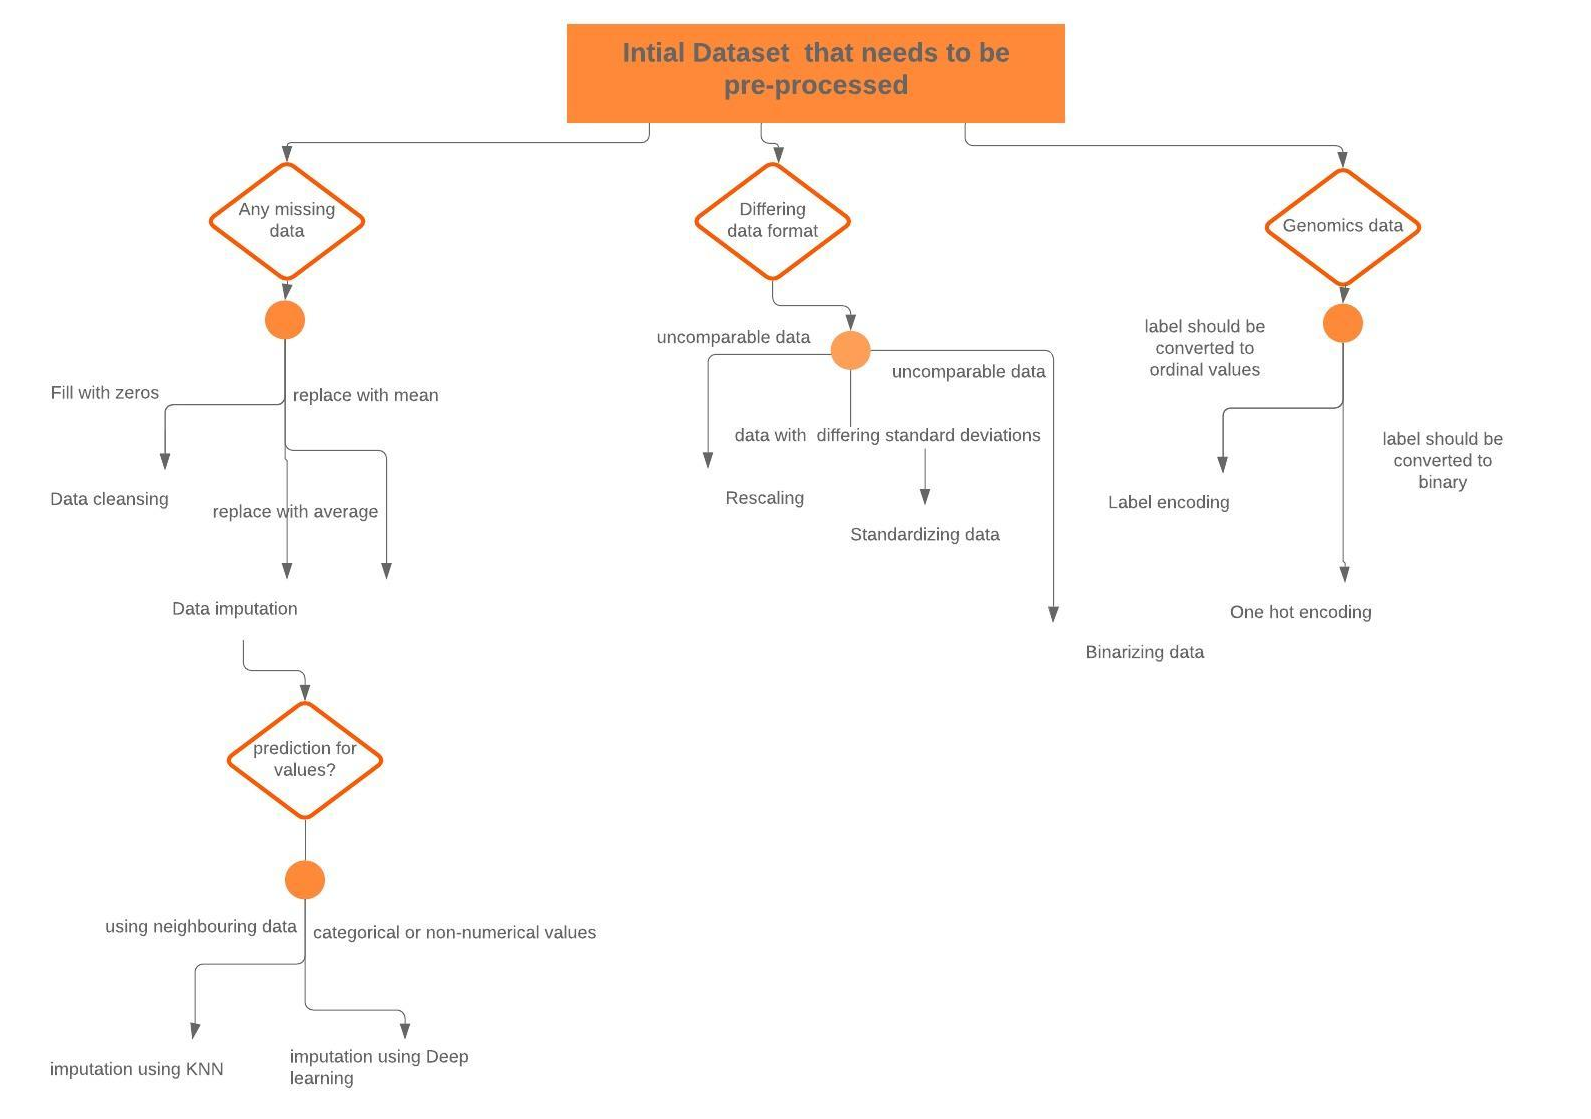

# **Data Cleansing**
Data cleaning is essentially the task of removing errors and anomalies or replacing observed values with true values from data to get more value in analytics. 

Missing data refers to values that are missing from a dataset. Missing value imputation is the process of replacing missing data with substituted values. In practice, the problem is more complicated because missing data is not represented by Nulls but instead by garbage

In [ ]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='somaticbreast_proc2.csv', 
    header=None, 
    sep=',')

 
df.fillna(value=0, inplace = True)
print ("null values: ", df.isna().sum())

null values:  0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


# **Duplicated Rows**
To set the criteria for whether a row is duplicate or not, you specify a single column or a set of columns to use as keys. Two rows are considered duplicates only when the values in all key columns are equal.

In [ ]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='somaticbreast_proc2.csv', 
    header=None, 
    sep=',')
duplicate_rows_df = df[df.duplicated()]
print ("number of duplicate rows: ", duplicate_rows_df.shape)
df.drop_duplicates().shape 

number of duplicate rows:  (316, 8)


(831, 8)

# **Rescaling**
Rescaling data is the process of making non-uniform attributes of a dataset uniform. . Scaling can be used if you need to change the type of your data measurements for example from millimetres to kilometres or from acres to square inches. It is also often used to compare two data sets that are otherwise uncomparable because they use a different scale.

For instance, suppose teacher A grades her students on a 100 point basis, while another teacher B, teaching the same subject, grades her students on a basis of 170 points. Assume the difficulty level of all tests and homework are standardized between classes. To find out which class was doing better, you could rescale the class A data by mapping every member of data set x to f(x) where f(x)= 1.7x.

It is done using MinMaxScaler class which comes under scikit-learn, also known as sklearn.
Now, let us explore this method with an example. The ‘winequality-red.csv’ dataset is used for explaining the data preprocessing methods here.

# New Section

In [ ]:
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler
url='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pandas.read_csv(url,sep=';')
array = df.values
#Separating data into input and output components
x = array[:,0:8]
y = array[:,8]
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(x)
numpy.set_printoptions(precision = 3) #Setting precision for the output
print(rescaledX[0:5,:])

[[0.248 0.397 0.    0.068 0.107 0.141 0.099 0.568]
 [0.283 0.521 0.    0.116 0.144 0.338 0.216 0.494]
 [0.283 0.438 0.04  0.096 0.134 0.197 0.17  0.509]
 [0.584 0.11  0.56  0.068 0.105 0.225 0.191 0.582]
 [0.248 0.397 0.    0.068 0.107 0.141 0.099 0.568]]


# **Standardizing Data**
Standardizing data helps us transform attributes with a Gaussian distribution of differing means and of differing standard deviations into a standard Gaussian distribution with a mean of 0 and a standard deviation of 1. Standardization of data is done using scikit-learn with the StandardScaler class.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(x)
rescaledX = scaler.transform(x)
rescaledX[0:5,:]

array([[-0.528,  0.962, -1.391, -0.453, -0.244, -0.466, -0.379,  0.558],
       [-0.299,  1.967, -1.391,  0.043,  0.224,  0.873,  0.624,  0.028],
       [-0.299,  1.297, -1.186, -0.169,  0.096, -0.084,  0.229,  0.134],
       [ 1.655, -1.384,  1.484, -0.453, -0.265,  0.108,  0.412,  0.664],
       [-0.528,  0.962, -1.391, -0.453, -0.244, -0.466, -0.379,  0.558]])

# **Binarizing Data**
In this method, all the values that are above the threshold are transformed into 1 and those equal to or below the threshold are transformed into 0. This method is useful when we deal with probabilities and need to convert the data into crisp values. Binarizing is done using the Binarizer class.

In [ ]:
from sklearn.preprocessing import Binarizer 
import pandas as pd
import numpy 
df = pd.read_csv(
    filepath_or_buffer='pima-indians-diabetes.csv', 
      sep=',')
print(df)
array = df.values 
  
# separate array into input and output components 
X = array[:,0:8] 
Y = array[:,8] 
binarizer = Binarizer(threshold=0.0).fit(X) 
binaryX = binarizer.transform(X) 
  
# summarize transformed data 
numpy.set_printoptions(precision=3) 
print(binaryX[0:5,:]) 

      6  148  72  35    0  33.6  0.627  50  1
0     1   85  66  29    0  26.6  0.351  31  0
1     8  183  64   0    0  23.3  0.672  32  1
2     1   89  66  23   94  28.1  0.167  21  0
3     0  137  40  35  168  43.1  2.288  33  1
4     5  116  74   0    0  25.6  0.201  30  0
..   ..  ...  ..  ..  ...   ...    ...  .. ..
762  10  101  76  48  180  32.9  0.171  63  0
763   2  122  70  27    0  36.8  0.340  27  0
764   5  121  72  23  112  26.2  0.245  30  0
765   1  126  60   0    0  30.1  0.349  47  1
766   1   93  70  31    0  30.4  0.315  23  0

[767 rows x 9 columns]
[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]]


#Discretization
Discretization is the process through which we can transform continuous variables, models or functions into a discrete form. We do this by creating a set of contiguous intervals (or bins) that go across the range of our desired variable/model/function.
Continuous features have a smaller chance of correlating with the target variable due to infinite degrees of freedom and may have a complex non-linear relationship. Thus, it may be harder to interpret an such a function. After discretizing a variable, groups corresponding to the target can be interpreted.
It is easier to understand continuous data (such as weight) when divided and stored into meaningful categories or groups.
Certain models may be incompatible with continuous data, for example, alternative decision-tree models such as a Random-Forest model is not suitable for continuous features.
Feature engineering methods, for example any entropy-based methods may not work with continuous data, thus we would discretize variables to work with different models & methods.
Approaches to Discretization
  Unsupervised:
    — Equal-Width
    — Equal-Frequency
    — K-Means
  Supervised:
    — Decision Trees

##Bin continuous data into intervals(bins) sample-wise using KBinsDiscretizer which takes two parameters:

* n_bins : int (default = 5) The number of bins to produce. The intervals for the bins are determined by the minimum and maximum of the input data. It must be greater than or equal to 2.  
*   strategy : ‘uniform’, ‘quantile’ or ‘kmeans’ (default = ‘quantile’) 
Strategy used to define the widths of the bins:

 1.   'uniform’: All (interval) in each sample have identical widths(Equal Width Discretization) 
 2.   ‘quantile’: All bins in each sample have the same number of points(Equal Frequency Discretization)
 3.   kmeans : Values in each bin have the same nearest center of a 1D k-means cluster.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
#construct dataframe 
data = pd.DataFrame(np.random.randint(-10,100,size=(200, 5))*0.2, columns=list('ABCDE'))
#save it
data.to_csv(r'data.csv', index = False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


      A     B     C     D     E
0   2.8  -0.6  -1.8  12.8  14.4
1  10.2  12.0   5.0  11.2  17.4
2  18.0   3.2   1.6   6.8  -0.6
3  18.0  14.4  12.0  14.4  17.0
4  15.0  11.0   8.4  -1.2  16.2


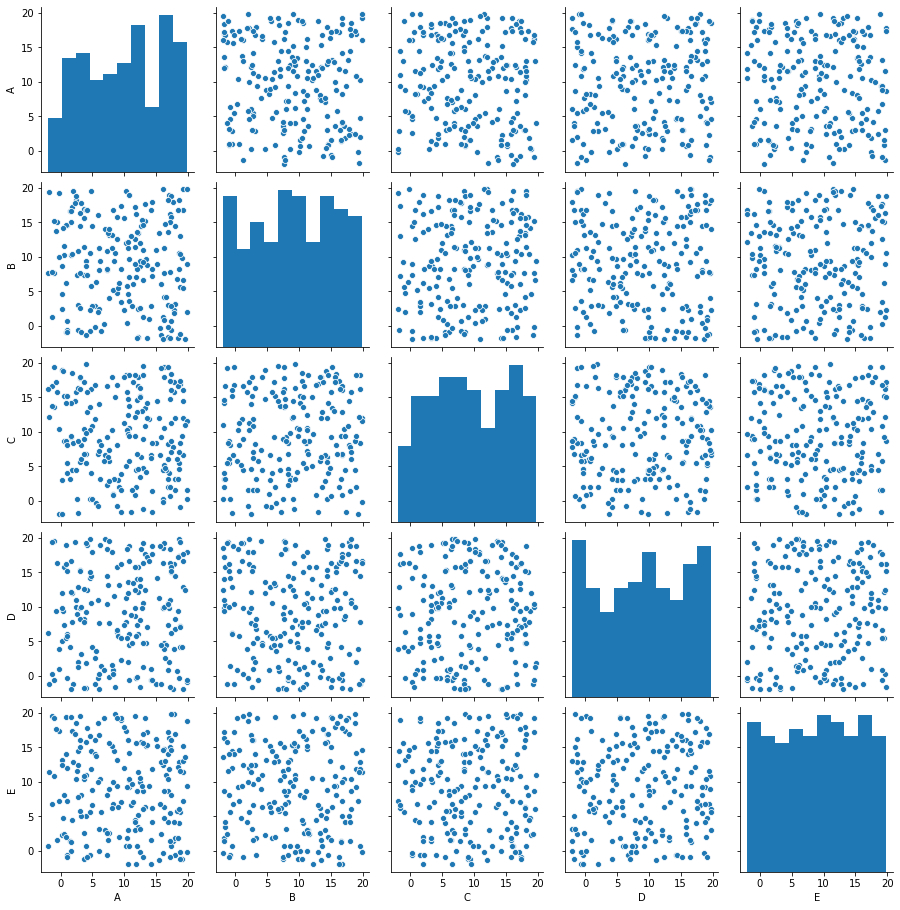

In [ ]:
data = pd.read_csv("data.csv") 
print(data.head())
sns.pairplot(data)

Equal Width Discretization: Separating all possible values into ‘N’ number of bins, each having the same width. Formula for interval width:

Width = (maximum value - minimum value) / N
* where N is the number of bins or intervals.

In [ ]:
kb=KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data = pd.read_csv("data.csv")
X=kb.fit_transform(data.values)
data[:]=X
sns.pairplot(data)
print(data.head())



Equal Frequency Discretization: Separating all possible values into ‘N’ number of bins, each having the same amount of observations. Intervals may correspond to quantile values.

In [ ]:
kb=KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data = pd.read_csv("data.csv")
X=kb.fit_transform(data.values)
data[:]=X
sns.pairplot(data)
print(data.head())

K-means Discretization :We apply K-Means clustering to the continuous variable, thus dividing it into discrete groups or clusters.

In [ ]:
kb=KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
data = pd.read_csv("data.csv")
X=kb.fit_transform(data.values)
data[:]=X
sns.pairplot(data)
print(data.head())

Decision Tree Discretization:We use a decision tree to identify the optimal number of bins. When the model makes a decision, it assigns an observation for each node. These observations are then classified into discrete output for our variable.

#Data Imputation
Data imputation is the process of replacing missing data with substituted values. There are three main problems that missing data causes: missing data can introduce a substantial amount of bias, make the handling and analysis of the data more arduous, and create reductions in efficiency. When one or more values are missing for a case, most statistical packages default to discarding any case that has a missing value, which may introduce bias or affect the representativeness of the results. Imputation preserves all cases by replacing missing data with an estimated value based on other available information. Once all missing values have been imputed, the data set can then be analysed using standard techniques for complete data.
 The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.

**Imputation Using (Mean/Median) Values** :The mean/median of the non-missing values in a column is calculated and then replacing the missing values within each column separately and independently from the others. It can only be used with numeric data.
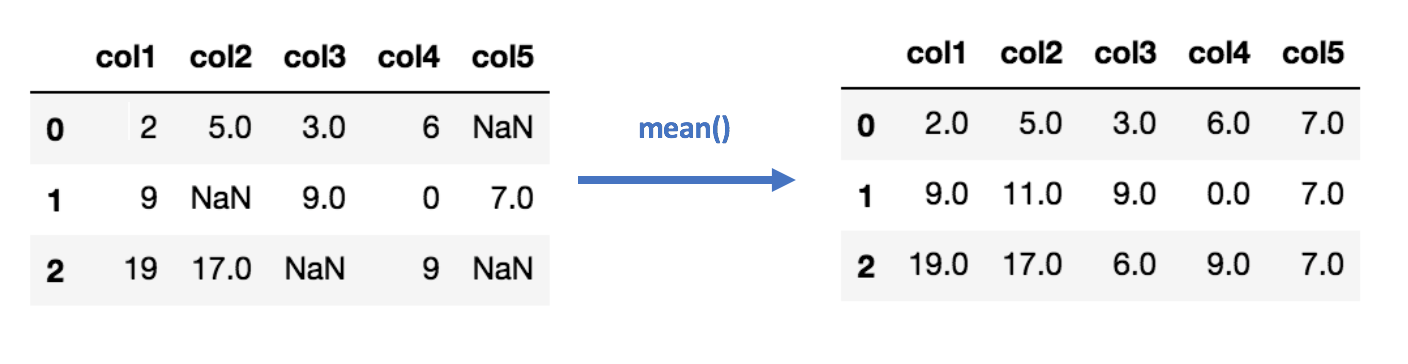






In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
df = pd.read_csv(
    filepath_or_buffer='somaticbreast_proc3.csv', 
    header=None, 
    sep=',')
print(df)

imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(df)
print(imp_mean.fit_transform(df))


        0    1      2     3    4    5  6
0     1.0  1.0   32.0  12.0  2.0  1.0  4
1     1.0  1.0   32.0  12.0  2.0  1.0  4
2     1.0  1.0   32.0  12.0  2.0  1.0  4
3     1.0  1.0   32.0  12.0  2.0  1.0  4
4     1.0  1.0   32.0  11.0  2.0  1.0  4
...   ...  ...    ...   ...  ...  ... ..
1142  1.0  1.0    2.0   2.0  1.0  1.0  4
1143  1.0  1.0  123.0  14.0  2.0  1.0  4
1144  1.0  1.0  123.0  14.0  2.0  1.0  4
1145  1.0  1.0    2.0   2.0  1.0  5.0  4
1146  2.0  1.0    2.0   2.0  1.0  4.0  4

[1147 rows x 7 columns]
[[  1.   1.  32. ...   2.   1.   4.]
 [  1.   1.  32. ...   2.   1.   4.]
 [  1.   1.  32. ...   2.   1.   4.]
 ...
 [  1.   1. 123. ...   2.   1.   4.]
 [  1.   1.   2. ...   1.   5.   4.]
 [  2.   1.   2. ...   1.   4.   4.]]


**Data Imputation**


**Imputation Using (Most Frequent)**-It is another statistical strategy to impute missing values and it works with categorical features (strings or numerical representations) by replacing missing data with the most frequent values within each column.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
df = pd.read_csv(
    filepath_or_buffer='somaticbreast_proc2.csv', 
    header=None, 
    sep=',')
print(df)
imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))


        0    1      2     3    4    5    6  7
0     1.0  1.0   32.0  12.0  2.0  1.0    a  4
1     1.0  1.0   32.0  12.0  2.0  1.0    b  4
2     1.0  1.0   32.0  12.0  2.0  1.0    c  4
3     1.0  1.0   32.0  12.0  2.0  1.0    d  4
4     1.0  1.0   32.0  11.0  2.0  1.0  NaN  4
...   ...  ...    ...   ...  ...  ...  ... ..
1142  1.0  1.0    2.0   2.0  1.0  1.0    q  4
1143  1.0  1.0  123.0  14.0  2.0  1.0    a  4
1144  1.0  1.0  123.0  14.0  2.0  1.0    b  4
1145  1.0  1.0    2.0   2.0  1.0  5.0    c  4
1146  2.0  1.0    2.0   2.0  1.0  4.0    d  4

[1147 rows x 8 columns]
[[1.0 1.0 32.0 ... 1.0 'a' 4]
 [1.0 1.0 32.0 ... 1.0 'b' 4]
 [1.0 1.0 32.0 ... 1.0 'c' 4]
 ...
 [1.0 1.0 123.0 ... 1.0 'b' 4]
 [1.0 1.0 2.0 ... 5.0 'c' 4]
 [2.0 1.0 2.0 ... 4.0 'd' 4]]


**Imputation Using k-NN**:The k nearest neighbours is an algorithm that is used for simple classification. The algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. This can be very useful in making predictions about the missing values by finding the k’s closest neighbours to the observation with missing data and then imputing them based on the non-missing values in the neighbourhood.It creates a basic mean impute then uses the resulting complete list to construct a KDTree. Then, it uses the resulting KDTree to compute nearest neighbours (NN). After it finds the k-NNs, it takes the weighted average of them.


In [ ]:
!pip install -q impyute
import sys
import pandas as pd
import numpy as np
from impyute.imputation.cs import fast_knn
from impyute.imputation.cs import mice
df = pd.read_csv(
    filepath_or_buffer='somaticbreast_proc3.csv', 
    header=None, 
    sep=',')
print(df)

sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training=fast_knn(df.values, k=30)
imputed_training=mice(df.values)
print(imputed_training)

        0    1      2     3    4    5  6
0     1.0  1.0   32.0  12.0  2.0  1.0  4
1     1.0  1.0   32.0  12.0  2.0  1.0  4
2     1.0  1.0   32.0  12.0  2.0  1.0  4
3     1.0  1.0   32.0  12.0  2.0  1.0  4
4     1.0  1.0   32.0  11.0  2.0  1.0  4
...   ...  ...    ...   ...  ...  ... ..
1142  1.0  1.0    2.0   2.0  1.0  1.0  4
1143  1.0  1.0  123.0  14.0  2.0  1.0  4
1144  1.0  1.0  123.0  14.0  2.0  1.0  4
1145  1.0  1.0    2.0   2.0  1.0  5.0  4
1146  2.0  1.0    2.0   2.0  1.0  4.0  4

[1147 rows x 7 columns]


**Imputation Using Multivariate Imputation by Chained Equation (MICE)**:This type of imputation works by filling the missing data multiple times. Multiple Imputations (MIs) are much better than a single imputation as it measures the uncertainty of the missing values in a better way. The chained equations approach is also very flexible and can handle different variables of different data types (ie., continuous or binary) as well as complexities such as bounds or survey skip patterns

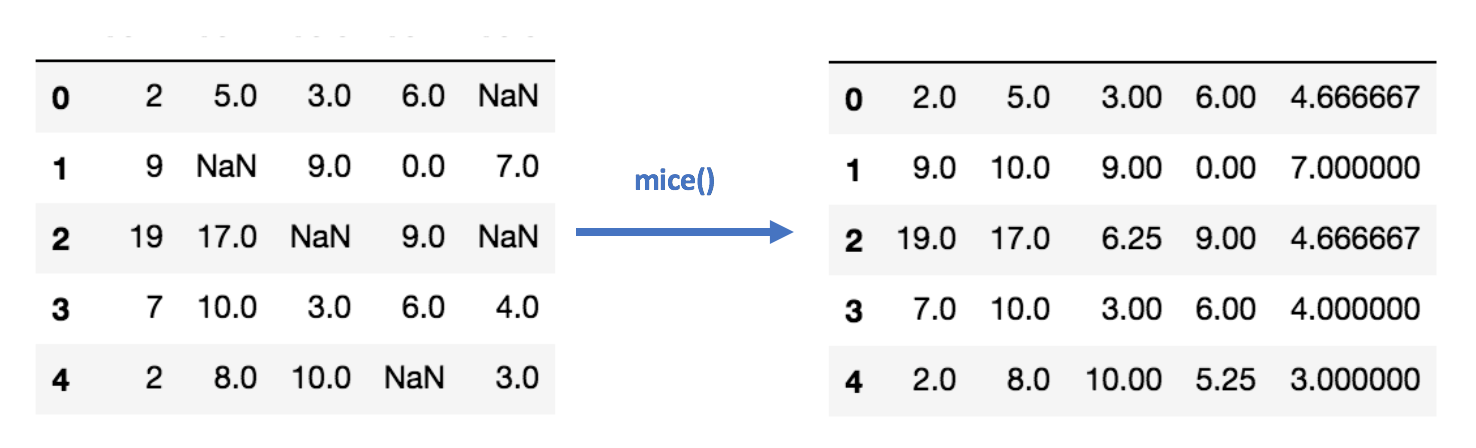

In [ ]:
!pip install -q impyute
import sys
import pandas as pd
import numpy as np
from impyute.imputation.cs import mice
df = pd.read_csv(
    filepath_or_buffer='somaticbreast_proc3.csv', 
    header=None, 
    sep=',')
print(df)

sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training=mice(df.values)
print(imputed_training)


        0    1      2     3    4    5  6
0     1.0  1.0   32.0  12.0  2.0  1.0  4
1     1.0  1.0   32.0  12.0  2.0  1.0  4
2     1.0  1.0   32.0  12.0  2.0  1.0  4
3     1.0  1.0   32.0  12.0  2.0  1.0  4
4     1.0  1.0   32.0  11.0  2.0  1.0  4
...   ...  ...    ...   ...  ...  ... ..
1142  1.0  1.0    2.0   2.0  1.0  1.0  4
1143  1.0  1.0  123.0  14.0  2.0  1.0  4
1144  1.0  1.0  123.0  14.0  2.0  1.0  4
1145  1.0  1.0    2.0   2.0  1.0  5.0  4
1146  2.0  1.0    2.0   2.0  1.0  4.0  4

[1147 rows x 7 columns]
[[  1.   1.  32. ...   2.   1.   4.]
 [  1.   1.  32. ...   2.   1.   4.]
 [  1.   1.  32. ...   2.   1.   4.]
 ...
 [  1.   1. 123. ...   2.   1.   4.]
 [  1.   1.   2. ...   1.   5.   4.]
 [  2.   1.   2. ...   1.   4.   4.]]


**Imputation Using Deep Learning (Datawig):**works very well with categorical and non-numerical features. It is a library that learns Machine Learning models using Deep Neural Networks to impute missing values in a dataframe.

In [ ]:
!pip install -q datawig
import datawig
import sys
import pandas as pd
import numpy as np

df = pd.read_csv(
    filepath_or_buffer='somaticbreast_proc3.csv', 
    header=None, 
    sep=',')
print(df)
df_train, df_test = datawig.utils.random_split(df)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['1','2','3','4','5','6','7'], # column(s) containing information about the column we want to impute
    output_column= '7', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train, num_epochs=50)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test)

# Preprocessing DNA sequences for ML

In computational biology, many computational biologists work with DNA/RNA sequence data daily. DNA/RNA sequence data are usually contained in a file format called "fasta" format. Each sequence data consists in a sequence of four nucleotide types {A,C,G,U} in a FASTA format:
>information about the sequence
ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAA



How can we use these sequences for machine or deep learning? 
The first preprocessing step is to encode the data so it can be used by different ML algorithms.

There are 3 general approaches for this:
*  1.Label-encoding 
*  2.One-hot encoding 
*  3.Using various "language" processing methods


## 1. Label-encoding

This approach is very simple and it involves converting each value in a column to a number.

For DNA it's encoding each nucleotide characters as an ordinal values. For example “ACGT” becomes [0, 1, 2, 3]. N is encoded as [4]. Let's see an example:

In [ ]:
# EXAMPLE
fasta = ">test_sequence\nATGTGTCGTAGTCGTACGNN"
# load the required librairies
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
import re

#check for and grab sequence name
if re.search(">",fasta):
   name = re.split("\n",fasta)[0]
   sequence = re.split("\n",fasta)[1]
else :
   name = 'unknown_sequence'
   sequence = fasta
sequence = sequence.lower()  
#get sequence into an array
sequence = re.sub('[^acgt]', 'z', sequence)
seq_array = np.array(list(sequence))
print(seq_array)
#integer encode the sequence
label_encoder = LabelEncoder()
integer_encoded_seq = label_encoder.fit(np.array(['a','c','g','t','z']))
print(integer_encoded_seq)

['a' 't' 'g' 't' 'g' 't' 'c' 'g' 't' 'a' 'g' 't' 'c' 'g' 't' 'a' 'c' 'g'
 'z' 'z']
LabelEncoder()


And here is a function to encode a DNA sequence string as an ordinal vector. It returns a numpy array with a=0.25, c=0.50, g=0.75, t=1.00, n=0.00.

In [ ]:
# function to encode a DNA sequence string as an ordinal vector
# returns a numpy vector with a=0.25, c=0.50, g=0.75, t=1.00, n=0.00
def ordinalEncoder(dna_array):
    integer_encoded_seq=label_encoder.transform(seq_array)
    print(integer_encoded_seq)
    float_encoded = integer_encoded_seq.astype(float)
    float_encoded[float_encoded == 0] = 0.25 # A
    float_encoded[float_encoded == 1] = 0.50 # C
    float_encoded[float_encoded == 2] = 0.75 # G
    float_encoded[float_encoded == 3] = 1.00 # T
    float_encoded[float_encoded == 4] = 0.00 # anything else, z
    return float_encoded

In [ ]:
ordinalEncoder(test_sequence)

[0 3 2 3 2 3 1 2 3 0 2 3 1 2 3 0 1 2 4 4]


array([0.25, 1.  , 0.75, 1.  , 0.75, 1.  , 0.5 , 0.75, 1.  , 0.25, 0.75,
       1.  , 0.5 , 0.75, 1.  , 0.25, 0.5 , 0.75, 0.  , 0.  ])

## 2. One-hot encoding

One hot encoding is a way to represent categorical data as binary vectors. For DNA, we have four catagories A, T, G, and C. For RNA, the four catagories are A, U, G, and C.

Then, each nucleotide value is represented as a binary vector that is all zero values except the index of the nucleotide, which is marked with a 1.

Thus a one hot code for DNA could be:
A = [1, 0, 0, 0]
T = [0, 1, 0, 0]
G = [0, 0, 1, 0]
C = [0, 0, 0, 1]

So the sequence AATTC would be:
[[1, 0, 0, 0],
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 1, 0, 0],
[0, 0, 0, 1]]


In the same logic a one hot code for DNA could be:
A = [1, 0, 0, 0]
U = [0, 1, 0, 0]
G = [0, 0, 1, 0]
C = [0, 0, 0, 1]

So the sequence AAUUC would be:
[[1, 0, 0, 0],
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 1, 0, 0],
[0, 0, 0, 1]]

In [ ]:
# one hot encode function for DNA
import numpy as np
def one_hot_encodedna(seq):
    mapping = dict(zip("ACGT", range(4)))    
    seq2 = [mapping[i] for i in seq]
    return np.eye(4)[seq2]

one_hot_encodedna("AACGTACGTGCGTAATGC")

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [ ]:
# one hot encode function for RNA
import numpy as np
def one_hot_encodeRna(seq):
    mapping = dict(zip("ACGU", range(4)))    
    seq2 = [mapping[i] for i in seq]
    return np.eye(4)[seq2]

one_hot_encodeRna("AACGUACGUGCGUAAUGC")

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

# Batch Effect Correction
It is a data- cleaning approach where batch effects are estimated and removed from the data. A batch effect occurs when non-biological factors in an experiment cause changes in the data produced by the experiment. Such effects can lead to inaccurate conclusions when their causes are correlated with one or more outcomes of interest in an experiment.They are most commonly discussed in the context of genomics and high-throughput sequencing research, but they exist in other fields of science as well.Various statistical techniques have been developed to attempt to correct for batch effects in high-throughput experiments. These techniques are intended for use during the stages of experimental design and data analysis.A number of algorithms have been proposed to tackle this problem (Barkas et al., 2018; Butler et al., 2018; Haghverdi et al., 2018; Hie et al., 2019; Korsunsky et al., 2018; Stuart et al., 2019), but most of them struggle with excessive run time or resource requirements. This is likely to be further exacerbated as the size of scRNA-Seq collections continues to grow. The need for effective scaling into huge datasets is leading to scRNA-Seq analysis becoming established in Python, with SCANPY (Wolf et al., 2018) offering a comprehensive set of analysis and visualization tools covering the entirety of a typical workflow.Here, we use BBKNN (batch balanced k nearest neighbours), a simple, fast and lightweight Batch effect removal tool for single cell RNA-Seq data that can be directly used in the scanpy workflow.

The Figure below shows principal component analysis (PCA) plots before (left) and after (right) batch-effect correction.
The intended analysis was to classify lymphocytes (blue color) and myeloid (red color) immune cell types using data from two studies (GSE3982 and GSE28490). However, as shown below, unwanted batch-effect variations between the two data sources (triangles and closed circles) dominated the first plot (left) but disappeared after batch-effect correction (right) using the comBat algorithm (Johnson W.E. 2007, Biostatistics). To identify batch-effect variations, we analyzed the top 500 variable genes ranked by interquartile range (IQR), across the samples of the merged data sets


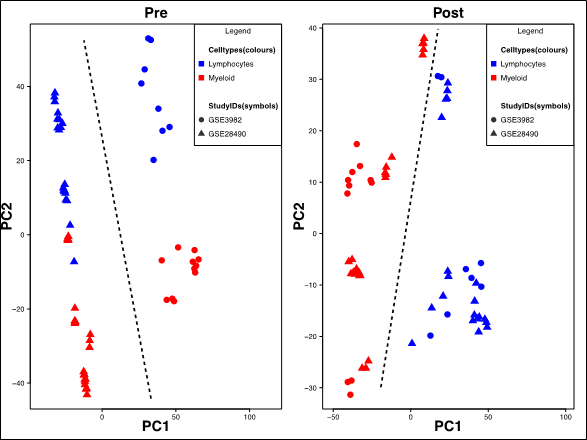



In [ ]:
!pip install scanpy #to install scanpy

     |████████████████████████████████| 7.2MB 2.6MB/s 
     |████████████████████████████████| 122kB 41.4MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 


Pancreas dataset

Human pancreas dataset from 4 different studies (Segerstolpe16, Baron16, Wang16, Muraro16) is used, which have been used in the seminal papers on single-cell dataset integration (Butler18, Haghverdi18).


In [ ]:
import scanpy as sc

adata_all = sc.read('data/pancreas.h5ad', backup_url='https://www.dropbox.com/s/qj1jlm9w10wmt0u/pancreas.h5ad?dl=1')

/usr/local/lib/python3.6/dist-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


In [ ]:
adata_all.shape# print the shape of adata_all

(14693, 2448)

In [ ]:
counts = adata_all.obs.celltype.value_counts()
counts

alpha                     4214
beta                      3354
ductal                    1804
acinar                    1368
not applicable            1154
delta                      917
gamma                      571
endothelial                289
activated_stellate         284
dropped                    178
quiescent_stellate         173
mesenchymal                 80
macrophage                  55
PSC                         54
unclassified endocrine      41
co-expression               39
mast                        32
epsilon                     28
mesenchyme                  27
schwann                     13
t_cell                       7
MHC class II                 5
unclear                      4
unclassified                 2
Name: celltype, dtype: int64

To simplify visualization, let’s remove the 5 minority classes.

In [ ]:
minority_classes = counts.index[-5:].tolist()        # get the minority classes
adata_all = adata_all[                               # actually subset
    ~adata_all.obs.celltype.isin(minority_classes)]
adata_all.obs.celltype.cat.reorder_categories(       # reorder according to abundance
    counts.index[:-5].tolist(), inplace=True)

Seeing the batch effect

In [ ]:
sc.pp.pca(adata_all)# Computes PCA coordinates, loadings and variance decomposition
sc.pp.neighbors(adata_all)#Compute a neighborhood graph of observations
sc.tl.umap(adata_all)#

TO observe a batch effect.

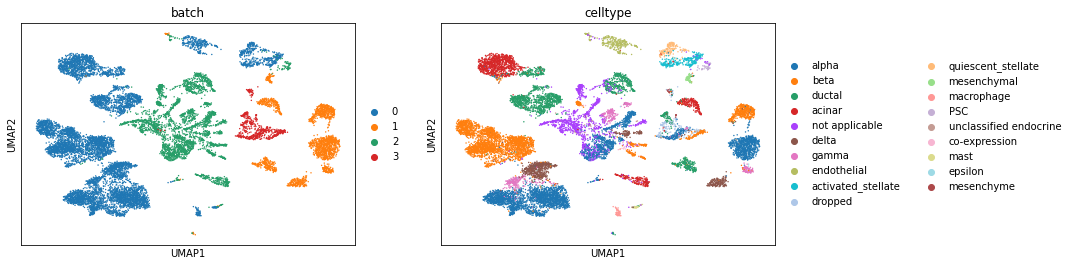

In [ ]:
sc.pl.umap(adata_all, color=['batch', 'celltype'], palette=sc.pl.palettes.vega_20_scanpy)

As we can observe from above figures experimental variation added by batch effects leads to cells being unable to connect to the same cell type/state across batches, introducing distortion and fracturing to this graph structure. This causes significant problems in all downstream analysis options. This problem can be solved by BBKNN modifies the neighbourhood construction step to produce a graph that is balanced across all batches of the data. This approach treats the neighbour network as the primary representation of the data. For each cell, the BBKNN graph is constructed by finding the k nearest neighbours for each cell in each user defined batch independently, resulting in each cell having an independent pool of neighbours in each batch. BBKNN’s main assumption is that at least some cells of the same type exist across batches, and that the differences between the same cell type across batches caused by batch effects are less than the differences between cells of different types within a batch.In this case, the graph construction will group together similar cell types across batches while leaving unrelated cell types well separated.

In [ ]:
!pip3 install bbknn # to install bbknn

In [ ]:
sc.external.pp.bbknn(adata_all, batch_key='batch')

In [ ]:
sc.tl.umap(adata_all)

In [ ]:
sc.pl.umap(adata_all, color=['batch', 'celltype'])

**#Feature Selection**


# Feature Selection


All machine learning workflows depend on feature engineering, which comprises feature extraction and feature selection that are fundamental building blocks of modern machine learning pipelines. Despite the fact that feature extraction and feature selection processes share some overlap, often, these terms are erroneously equated. Feature extraction is the process of using domain knowledge to extract new variables from raw data that make machine learning algorithms work. The feature selection process is based on selecting the most consistent, relevant, and non-redundant features.Feature selection, as a dimensionality reduction technique, aims to choose a small subset of the relevant features from the original features by removing irrelevant, redundant, or noisy features. Feature selection usually can lead to better learning performance, higher learning accuracy, lower computational cost, and better model interpretability.



The objectives of feature selection techniques include:

    simplification of models to make them easier to interpret by researchers/users
    shorter training times
    avoiding the curse of dimensionality
    enhanced generalization by reducing overfitting (formally, reduction of variance)

Dataset size reduction is more important nowadays because of the plethora of developed analysis methods that are at the researcher's disposal, while the size of an average dataset keeps growing both with respect to the number of features and samples.

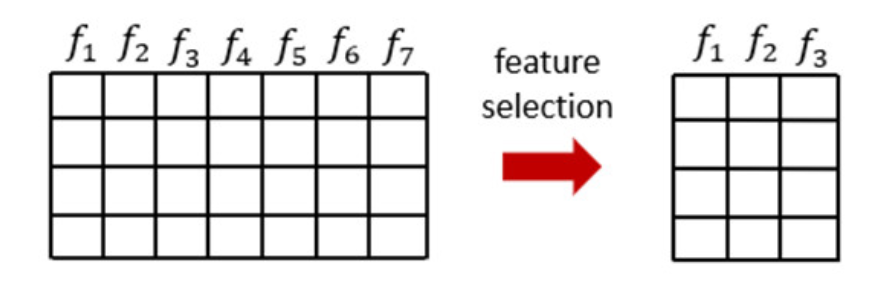

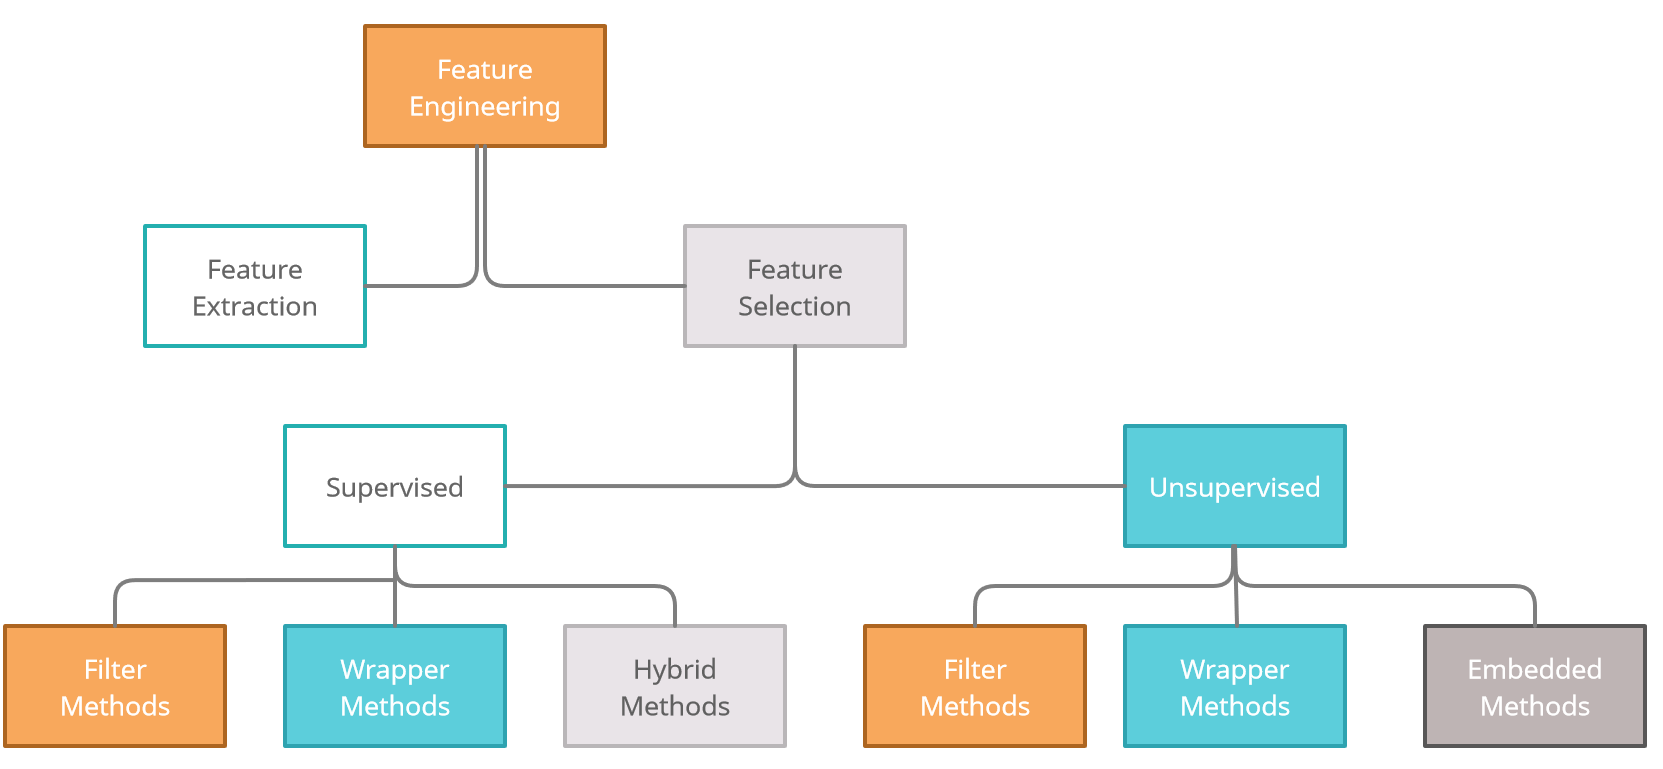

Supervised feature selection methods are classified into four types, based on the interaction with the learning model, such as the Filter, Wrapper, Hybrid, and Embedded Methods.
Filter Methodology

In the Filter method, features are selected based on statistical measures. It is independent of the learning algorithm and requires less computational time. Information gain, chi-square test, Fisher score, correlation coefficient, and variance threshold are some of the statistical measures used to understand the importance of the features.

The Filter methodology uses the selected metric to identify irrelevant attributes and also filter out redundant columns from the models. It gives the option of isolating selected measures that enrich a model. The columns are ranked following the calculation of the feature scores.

Wrapper Methodology

The Wrapper methodology considers the selection of feature sets as a search problem, where different combinations are prepared, evaluated, and compared to other combinations. A predictive model is used to evaluate a combination of features and assign model performance scores.

The performance of the Wrapper method depends on the classifier. The best subset of features is selected based on the results of the classifier.

Hybrid Methodology

The process of creating hybrid feature selection methods depends on what you choose to combine. The main priority is to select the methods you’re going to use, then follow their processes. The idea here is to use these ranking methods to generate a feature ranking list in the first step, then use the top k features from this list to perform wrapper methods.

Embedded Methodology

In embedded techniques, the feature selection algorithm is integrated as part of the learning algorithm. The most typical embedded technique is the decision tree algorithm. Decision tree algorithms select a feature in each recursive step of the tree growth process and divide the sample set into smaller subsets.

Filter Methodology

Due to the scarcity of readily available labels, unsupervised feature selection (UFS) methods are widely adopted in the analysis of high-dimensional data. However, most of the existing UFS methods primarily focus on the significance of features in maintaining the data structure while ignoring the redundancy among features. Moreover, the determination of the proper number of features is another challenge.

Unsupervised feature selection methods are classified into four types, based on the interaction with the learning model, such as the Filter, Wrapper, and Hybrid methods.Unsupervised feature selection methods based on the filter approach can be categorized as univariate and multivariate. Univariate methods, aka ranking-based unsupervised feature selection methods, use certain criteria to evaluate each feature to get an ordered ranking list of features, where the final feature subset is selected according to this order. Such methods can effectively identify and remove irrelevant features, but they are unable to remove redundant ones since they do not take into account possible dependencies among features. On the other hand, multivariate filter methods evaluate the relevance of the features jointly rather than individually. Multivariate methods can handle redundant and irrelevant features. Thus, in many cases, the accuracy reached by learning algorithms using the subset of features selected by multivariate methods is better than the one achieved by using univariate methods.

Wrapper Methodology

Unsupervised feature selection methods based on the wrapper approach can be divided into three broad categories

according to the feature search strategy: sequential, bio-inspired, and iterative. In sequential methodology, features are added or removed sequentially. Methods based on sequential search are easy to implement and fast.

On the other hand, a bio-inspired methodology tries to incorporate randomness into the search process, aiming to escape local optima.
Hybrid Methodology

Hybrid methods try to exploit the qualities of both approaches, filter and wrapper, trying to have a good compromise between efficiency (computational effort) and effectiveness (quality in the associated objective task when using the selected features).

In order to take advantage of the filter and wrapper approaches, hybrid methods include a filter stage where the features are ranked or selected by applying a measure based on the intrinsic properties of the data. While, in a wrapper stage, certain feature subsets are evaluated for finding the best one through a specific clustering algorithm. We can distinguish two types of hybrid methods: methods based on ranking and methods not based on the ranking of features.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from numpy import savetxt
import numpy as np

data = pd.read_csv('github_cnv.csv')
y = pd.read_csv('labels.csv')                  
# x = data.drop('SAMPLE_ID',axis = 1,inplace = True) 
# x = data.drop('SUBTYPE',axis = 1,inplace = True)
x=data
x = x.astype(np.float64)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100),max_features=1000)
sel.fit(x_train, y_train)
sel.get_support()
selected_feat= x_train.columns[(sel.get_support())]
print(selected_feat)
methx_1=x[selected_feat]
savetxt('newcnv_1000.csv', methx_1, delimiter=',')


FileNotFoundError: ignored



*   List item
*   List item

